## 3.1　K-近邻模型

## 3.2　惰性学习和非参数模型

## 3.3　KNN模型分类

代码3.1

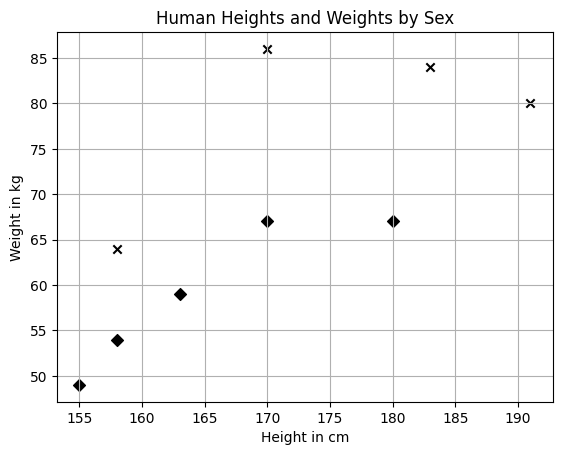

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
 [158, 64],
 [170, 86],
 [183, 84],
 [191, 80],
 [155, 49],
 [163, 59],
 [180, 67],
 [158, 54],
 [170, 67] 
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female',
  'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
# 使用 'x' 标记表示训练实例中的男性，使用菱形标记表示训练实例中的女性
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

代码3.2

In [4]:
x = np.array([[155, 70]])
distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [5]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

In [6]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

代码3.3

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
# 将标签转换为数值
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [8]:
K= 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1,
   -1))[0]
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

代码3.4

In [9]:
X_test = np.array([
 [168, 65],
 [180, 96],
 [160, 52],
 [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])
predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


代码3.5

In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized,
   predictions_binarized))

Accuracy: 0.75


代码3.6

In [11]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized,
  predictions_binarized))

Precision: 1.0


代码3.7

In [12]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized,
   predictions_binarized))

Recall: 0.5


代码3.8

In [13]:
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized,
  predictions_binarized))

F1 score: 0.6666666666666666


代码3.9

In [14]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' %
matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


代码3.10

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized,target_names=['male'], labels=[1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



## 3.4　KNN模型回归

代码3.11

In [27]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

X_train = np.array([
 [158, 1],
 [170, 1],
 [183, 1],
 [191, 1],
 [155, 0],
 [163, 0],
 [180, 0],
 [158, 0],
 [170, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
 [168, 1],
 [180, 1],
 [160, 0],
 [169, 0]
])
y_test = [65, 96, 52, 67]

K= 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Predicted wieghts: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test,predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))
print('Mean squared error: %s' % mean_squared_error(y_test,predictions))

Predicted wieghts: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889


代码3.12

In [28]:
from scipy.spatial.distance import euclidean

# heights in millimeters
X_train = np.array([
 [1700, 1],
 [1600, 0]
])

x_test = np.array([1640, 1])
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

# heights in meters
X_train = np.array([
 [1.7, 1],
 [1.6, 0]
])
x_test = np.array([164, 1])
print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))


60.0
40.01249804748511
162.3
162.40307878855006


代码3.13

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]
ss = StandardScaler()
# 对训练集和测试集进行标准化
X_train_scaled = ss.fit_transform(X_train)

X_test_scaled = ss.transform(X_test)

K = 3
clf = KNeighborsRegressor(n_neighbors=K)

clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
print('Predicted wieghts: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))

Predicted wieghts: [78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error: 7.583333333333336
Mean squared error: 85.13888888888893
